# C3M4 Lesson 2 Practice Lab: London housing prices - Linear regression

In the previous lesson, you studied the price per square meter of London homes. Now, you wish to estimate the price of the houses that your company wants to sell. In this lab, you will use a linear regression model to do this.

In this lab you will be working with the following columns: 

- `latitude` & `longitude`: Geographic coordinates for mapping or location-based analysis.
- `bathrooms`: Number of bathrooms
- `bedrooms`: Number of bedrooms
- `floorAreaSqM`: The area in square meters of the property.
- `livingRooms`: The number of living rooms in the property.
- `price`: The price of the sale 

## General instructions
- **Replace any instances of `None` with your own code**. All `None`s must be replaced.
- **Compare your results with the expected output** shown below the code.
- **Check the solution** using the expandable cell to verify your answer.

Happy coding!

<div style="background-color: #FAD888; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">
<strong>Important note</strong>: Code blocks with None will not run properly. If you run them before completing the exercise, you will likely get an error. 
</div>

## Table of contents
- [Step 1: Import libraries](#import-libraries)
- [Step 2: Load the data](#load-the-data)
- [Step 3: Understanding the influence of features](#influence-of-features)
- [Step 4: Creating a linear regression model](#simple-linear-regression)
- [Step 5: Interpreting your model](#interpreting-your-model)

<a id="import-libraries"></a>

## Step 1: Import libraries
Begin by importing the needed libraries.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

<a id="load-the-data"></a>

## Step 2: Load the data
Next, load the data. Run the cell below to load the data.

In [2]:
df = pd.read_csv("london_house_price_2018.csv")
df.head()

,fullAddress,postcode,outcode,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,tenure,propertyType,currentEnergyRating,price
0,"Flat 1, White Rose Court, Widegate Street, Lon...",E1 7ES,E1,51.517972,-0.078028,2.0,2.0,73.0,1.0,Leasehold,Purpose Built Flat,D,623000
1,"Flat 5, White Rose Court, Widegate Street, Lon...",E1 7ES,E1,51.517972,-0.078028,1.0,2.0,50.0,1.0,Leasehold,Converted Flat,E,575000
2,"9A Petticoat Tower, Petticoat Square, London, ...",E1 7EE,E1,51.515798,-0.077081,1.0,2.0,72.0,2.0,Leasehold,Purpose Built Flat,C,385000
3,"Flat 11, Arcadia Court, 45 Old Castle Street, ...",E1 7NY,E1,51.516568,-0.074793,1.0,1.0,42.0,1.0,Leasehold,Purpose Built Flat,D,370000
4,"Flat 18, Arcadia Court, 45 Old Castle Street, ...",E1 7NY,E1,51.516568,-0.074793,1.0,1.0,39.0,1.0,Leasehold,Purpose Built Flat,C,364000


<a id="influence-of-features"></a>

## Step 3: Understanding the influence of features

### Create scatter plots

In order to predict the price of the house, you need to first learn which are the most relevant features to do so. `"floorAreaSqM"` is a great candidate, but you want to make sure it is the most important one in your dataset. Begin by creating scatter plots for all (non-categorical) numeric features.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Create a list with all numerical independent variables and the dependent variable: ("latitude", "longitude", "bathrooms", "bedrooms", "floorAreaSqM", "livingRooms", "price").
2. Use the `sns.pairpot()` function to visualize the scatter plot between numerical features.
</div>


<Figure size 640x480 with 0 Axes>

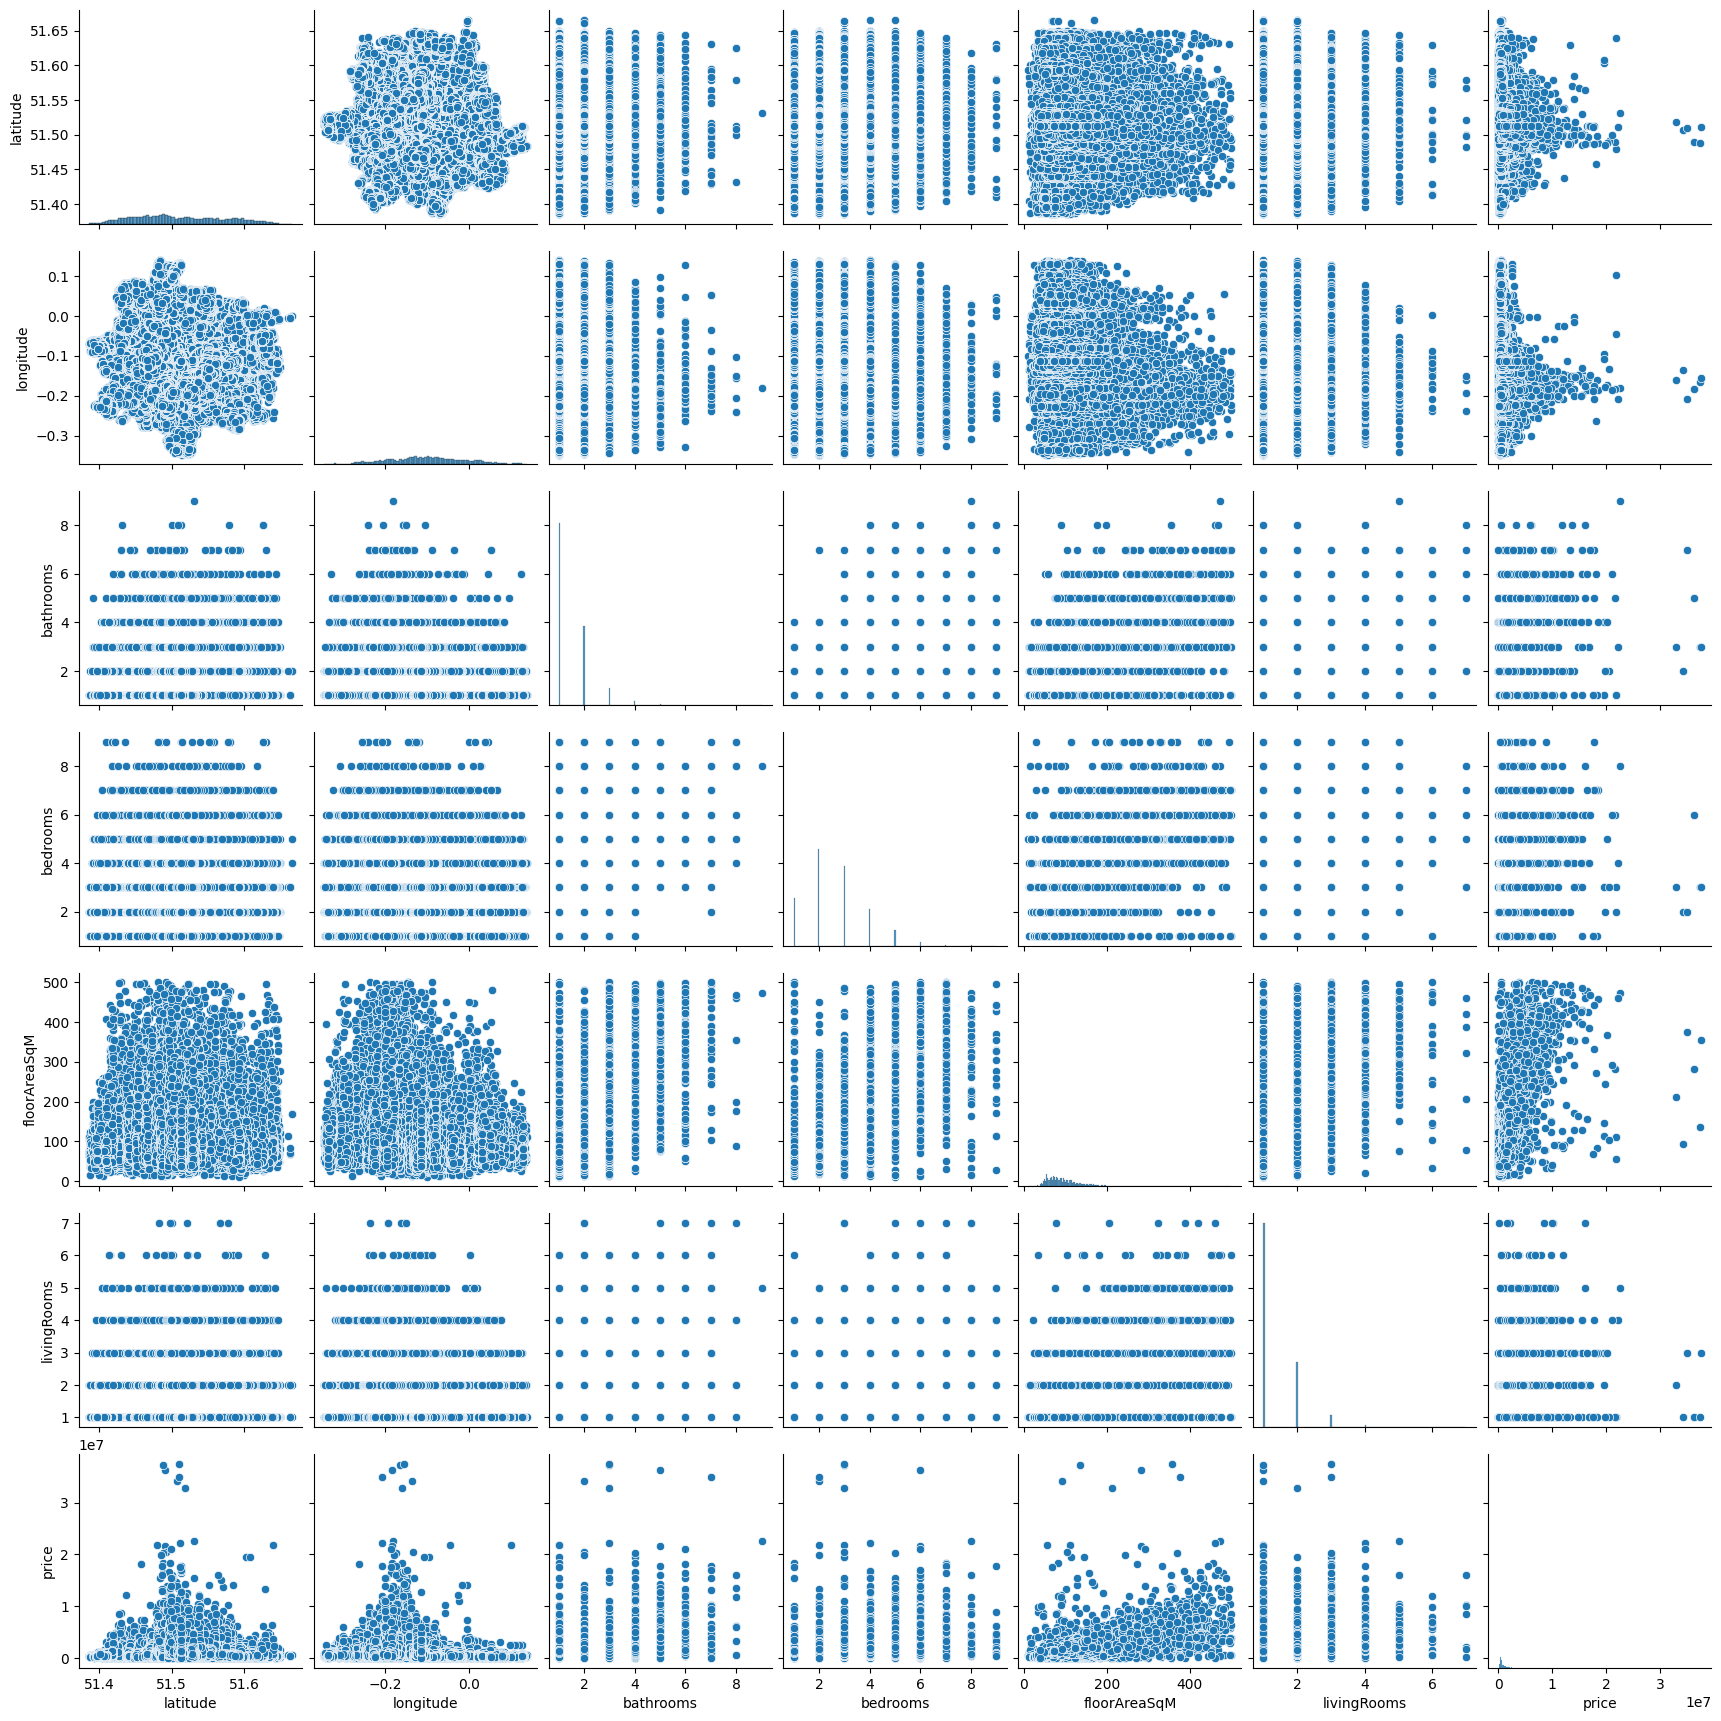

In [5]:
### START CODE HERE ###

# define a list of numerical features
numerical_features = ["latitude", "longitude", "bathrooms", "bedrooms", "floorAreaSqM", "livingRooms", "price"]
# create a pairplot, with the df with only numerical features selected
plt.figure()
axes = sns.pairplot(df[numerical_features])

### END CODE HERE ###

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgsL2/pairplot.png" width="1000">

</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# define a list of numerical features
numerical_features = ["latitude", "longitude", "bathrooms", "bedrooms", "floorAreaSqM",
                      "livingRooms", "price"]

# create a pairplot, with the df with only numerical features selected
plt.figure()
axes = sns.pairplot(df[numerical_features])

```
</details>

From the scatterplots it is not completely obvious which feature is the best, as none of them really stand out. Try calculating the correlations to numerically evaluate which of the features might be the best to use.

### Calculate the correlation

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%
">

**▶▶▶ Directions**
1. Use the `.corr()` method on the dataframe to calculate correlations between the features.
   - Make sure you select only the numerical columns.
</div>


In [6]:
### START CODE HERE ###

df[numerical_features].corr()

### END CODE HERE ###

,latitude,longitude,bathrooms,bedrooms,floorAreaSqM,livingRooms,price
latitude,1.000000,-0.051308,0.038546,0.037725,0.042568,0.070444,0.008352
longitude,-0.051308,1.000000,-0.207145,-0.086213,-0.165193,-0.055058,-0.234584
bathrooms,0.038546,-0.207145,1.000000,0.557272,0.663587,0.375192,0.550484
bedrooms,0.037725,-0.086213,0.557272,1.000000,0.802344,0.542835,0.429837
floorAreaSqM,0.042568,-0.165193,0.663587,0.802344,1.000000,0.626097,0.646681
livingRooms,0.070444,-0.055058,0.375192,0.542835,0.626097,1.000000,0.383612
price,0.008352,-0.234584,0.550484,0.429837,0.646681,0.383612,1.000000


<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 

<img src="imgsL2/corr.png" width="550">

</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
df[numerical_features].corr()
```
</details>

It seems that the first intuition is right! If working with only one predictor, `"floorAreaSqM"` is the way to go.

<a id="simple-linear-regression"></a>

## Step 4: Creating a linear regression model
Now you are ready to define and train the linear regression model. Create a model that uses `"floorAreaSqM"` as the independent variable, and `"price"` as the dependent variable.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Define a Series with the target variable (`"price"`).
2. Define a DataFrame with only one column: `"floorAreaSqM"` and add the constant to it using the `sm.add_constant()` function.
3. Define the linear regression model with the `sm.OLS()` function
4. Use the `fit()` method to fit the model to the data.
5. Print the model summary.
</div>

In [8]:
### START CODE HERE ###

# define the dependent variable
Y = df["price"]

# define the DataFrame with the independent variable and the constant term
X = sm.add_constant(df["floorAreaSqM"])

# create the model
model = sm.OLS(Y, X)

# fit the model
results = model.fit()

### END CODE HERE ###

# print the model summary
print(results.summary()) 

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 5.801e+04
Date:                Thu, 22 May 2025   Prob (F-statistic):               0.00
Time:                        08:29:39   Log-Likelihood:            -1.2037e+06
No. Observations:               80703   AIC:                         2.407e+06
Df Residuals:                   80701   BIC:                         2.407e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.171e+05   5349.807    -59.277   

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 
<br>
<span style="font-size: 11px;">

```mkdn
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.418
Model:                            OLS   Adj. R-squared:                  0.418
Method:                 Least Squares   F-statistic:                 5.801e+04
Date:                Sat, 15 Feb 2025   Prob (F-statistic):               0.00
Time:                        09:55:31   Log-Likelihood:            -1.2037e+06
No. Observations:               80703   AIC:                         2.407e+06
Df Residuals:                   80701   BIC:                         2.407e+06
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const        -3.171e+05   5349.807    -59.277      0.000   -3.28e+05   -3.07e+05
floorAreaSqM  1.085e+04     45.045    240.847      0.000    1.08e+04    1.09e+04
==============================================================================
Omnibus:                   152043.746   Durbin-Watson:                   1.197
Prob(Omnibus):                  0.000   Jarque-Bera (JB):        688803222.073
Skew:                          14.082   Prob(JB):                         0.00
Kurtosis:                     454.716   Cond. No.                         249.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
```
</span>
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# define the dependent variable
Y = df["price"]

# define the DataFrame with the independent variable and the constant term
X = sm.add_constant(df["floorAreaSqM"])

# create the model
model = sm.OLS(Y, X)

# fit the model
results = model.fit()
```
</details>

<a id="interpreting-your-model"></a>

## Step 5: Interpreting Your Model

Before even considering using the model, it is a good idea to stop and analyze your results. You can do this by looking at the R-squared, the coefficient values, and their p-values (`P>|t|`).

You can also use a visual aid.

<div style="background-color: #C6E2FF; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width:95%;">

**▶▶▶ Directions**
1. Retrieve the intercept (`m`) and slope (`b`) of the line defined by the model. You can use the `.params` attribute of the trained model.
2. Create a scatter plot showing the `"price"` values against `"floorAreaSqM"`.
3. Calculate the line of best fit for the data.
4. Add the fitted line (set `y=line`), so you can compare how far away the predictions are from the true values.
</div>

In [9]:
### START CODE HERE ###

# get the parameter values from the model
m = results.params[df["price"]]
b = results.params[df["const"]]

# crete the scatter plot
plt.scatter(df["price"], df["floorAreaSqM"])

# calculate the line of best fit
line = m * df["price"] + b

# add the line of best fit to the scatter plot
sns.lineplot(x=df["floorAreaSqM"], y=line, color="red")

### END CODE HERE ###

/tmp/ipykernel_91/2061797694.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  m = results.params[df["price"]]


IndexError: positional indexers are out-of-bounds

<details open>
<summary style="background-color: #c6e2ff6c; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.01); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Expected output:</summary> 


<img src="imgsL2/SLRfit.png" width="550">
</details>


<details>
<summary style="background-color: #FDBFC7; padding: 10px; border-radius: 3px; box-shadow: 0 2px 4px rgba(0, 0, 0, 0.1); width: 95%; text-align: left; cursor: pointer; font-weight: bold;">
Click here to see the solution</summary> 

<ul style="background-color: #FFF8F8; padding: 10px; border-radius: 3px; margin-top: 5px; width: 95%; box-shadow: inset 0 2px 4px rgba(0, 0, 0, 0.1);">
   
Your solution should look something like this:

```python
# get the parameter values from the model
m = results.params["floorAreaSqM"]
b = results.params["const"]

# crete the scatter plot
plt.scatter(df['floorAreaSqM'], df['price'])

# calculate the line of best fit
line = m * df["floorAreaSqM"] + b

# add the line of best fit to the scatter plot
sns.lineplot(x=df["floorAreaSqM"], y=line, color="red")
```
</details>

Congratulations for making it until the end of this lab. You will keep working on this dataset in Lesson 3, trying to improve the model using more variables. Hope you enjoyed it! 